# Atividade 2 EQ024: Tecnologias de Fluidização

## Aluno: João Eduardo Levandoski
### Obs: Os links podem ser clicados
[Resultados](#Resultados) Resultados

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import math
import pandas as pd

# Curva
### Gerador de distribuição aleatória, baseada na curva normal

In [2]:
numero_peneiras = 7 #Escolhendo o número de peneiras a ser utilizadas
razao = (2)**(1/2) #Escolhendo a razão entre os diâmetros das peneiras Raiz quadrada
abertura_1_penei = 6000 #Abertura da primeira peneira em microns 
media_dia = 4000 #Usando a media da distribuição normal,
                 #baseada no dado fornecido pela literatura
massa_total = 5680 #gramas 
var = 0.3 #Uma variação da curva normal para gerar os dados

In [3]:
random.seed(10)
dist_norm = []
for _ in range(massa_total):
    dist_norm.append(random.normalvariate(media_dia,
                                          media_dia*var))

## Classificação do diâmetro seguindo a razão inserida

In [4]:
anterior = float(abertura_1_penei)
for _ in range(numero_peneiras):
        agora = anterior/razao
        print(f'-{anterior:9.7}\t+{agora:9.7}')
        anterior = agora

-   6000.0	+ 4242.641
- 4242.641	+   3000.0
-   3000.0	+  2121.32
-  2121.32	+   1500.0
-   1500.0	+  1060.66
-  1060.66	+    750.0
-    750.0	+ 530.3301


A partir do resultado acima, buscar valores de mesh próximos   
aos valores dos diâmetros medidos na tabela abaixo

![Tabela de mesh](mesh.png)

Os valores de diâmetros escolhidos:

# Tamanho das peneiras escolhidas em Microns

In [5]:
peneiras = [
    6680, #Mesh 3
    4699, #Mesh 4
    3327, #Mesh 6
    2362, #Mesh 8
    1651, #Mesh 10
    1168, #Mesh 14
    833,  #Mesh 20
    589,  #Mesh 28
    0     #Fundo
]
peneiras = np.asarray(peneiras, dtype='int')

In [6]:
for i in range(len(peneiras)-2):
    print(f'Razão entre a peneira {peneiras[i]:5} e a\
    peneira {peneiras[i+1]:5}: {peneiras[i]/peneiras[i+1]:.4}')

Razão entre a peneira  6680 e a    peneira  4699: 1.422
Razão entre a peneira  4699 e a    peneira  3327: 1.412
Razão entre a peneira  3327 e a    peneira  2362: 1.409
Razão entre a peneira  2362 e a    peneira  1651: 1.431
Razão entre a peneira  1651 e a    peneira  1168: 1.414
Razão entre a peneira  1168 e a    peneira   833: 1.402
Razão entre a peneira   833 e a    peneira   589: 1.414


In [7]:
penei = {} #Criando um dicionário com os dados 
bins = [] #Será usado como base para distribuição do histograma
d_i = [None, ]
lista =[]
itens = 0

for i in dist_norm:
        if i >peneiras[0]:
            lista.append(i)
            itens += 1
bins.append(peneiras[0])
penei.update({str(peneiras[0]): lista})
            
for j in range(len(peneiras)-1):
    lista =[]
    for i in dist_norm:
        if peneiras[j] > i >=peneiras[j+1]:
            lista.append(i)
            itens += 1
    bins.append(peneiras[j+1])
    d_i += [(peneiras[j] + peneiras[j+1])/2]        
    penei.update({str(peneiras[j+1]): lista})
    
penei[str(peneiras[-1])] = []


In [8]:
diametro_inferior = []
massa_retida = []
for nome in penei:
    diametro_inferior.append(int(nome))
    massa_retida.append(len(penei[nome]))
    
diametro_inferior = np.asarray(diametro_inferior[::]) 
                        #Isso é um array com o diâmetro da peneira inferior
                        #presente em cada uma das peneiras
massa_retida = np.asarray(massa_retida[::]) #Massa de material presente em cada peneira
x_i = massa_retida/(itens-1)
X_i = np.cumsum(massa_retida[::-1])\
                /np.cumsum(massa_retida)[-1] #Calculando a fração acumulada
X_i = X_i[::-1]
bins = np.asarray(bins[::-1])
d_i = np.asarray(d_i)

In [9]:
df = pd.DataFrame((diametro_inferior[::], massa_retida[::], x_i*100, X_i*100, d_i))
df.rename(columns={0:'+3', 1:'-3\t+4',
                   2:'-4\t+6', 3:'-6\t+8',
                   4:'-8\t+10', 5:'-10\t+14',
                   6:'-14\t+20', 7:'-20\t+28',
                   8:'Fundo\t'}, inplace=True)
df.rename(index={0:'Diâmetro peneira ($\mu$m)', 1:'Massa Retida (g)',
                 2:'Frequência Ponderal', 3:'Fração Acumulada',
                 4:'Diâmetro médio ($\mu$m)'}, inplace=True)

# Frequencia

In [10]:
df

,+3,-3 +4,-4 +6,-6 +8,-8 +10,-10 +14,-14 +20,-20 +28,Fundo
Diâmetro peneira ($\mu$m),6680.000000,4699.000000,3327.000000,2362.000000,1651.000000,1168.000000,833.000000,589.000000,0.0
Massa Retida (g),69.000000,1457.000000,2556.000000,1090.000000,359.000000,101.000000,23.000000,10.000000,0.0
Frequência Ponderal,1.215217,25.660444,45.015851,19.196900,6.322649,1.778795,0.405072,0.176118,0.0
Fração Acumulada,100.000000,98.781995,73.062665,27.943513,8.702560,2.365402,0.582524,0.176523,0.0
Diâmetro médio ($\mu$m),NaN,5689.500000,4013.000000,2844.500000,2006.500000,1409.500000,1000.500000,711.000000,294.5


A tabela abaixo contém a mesma informação do script acima
![Frequencia](freq.png)

### Plot da distribuição

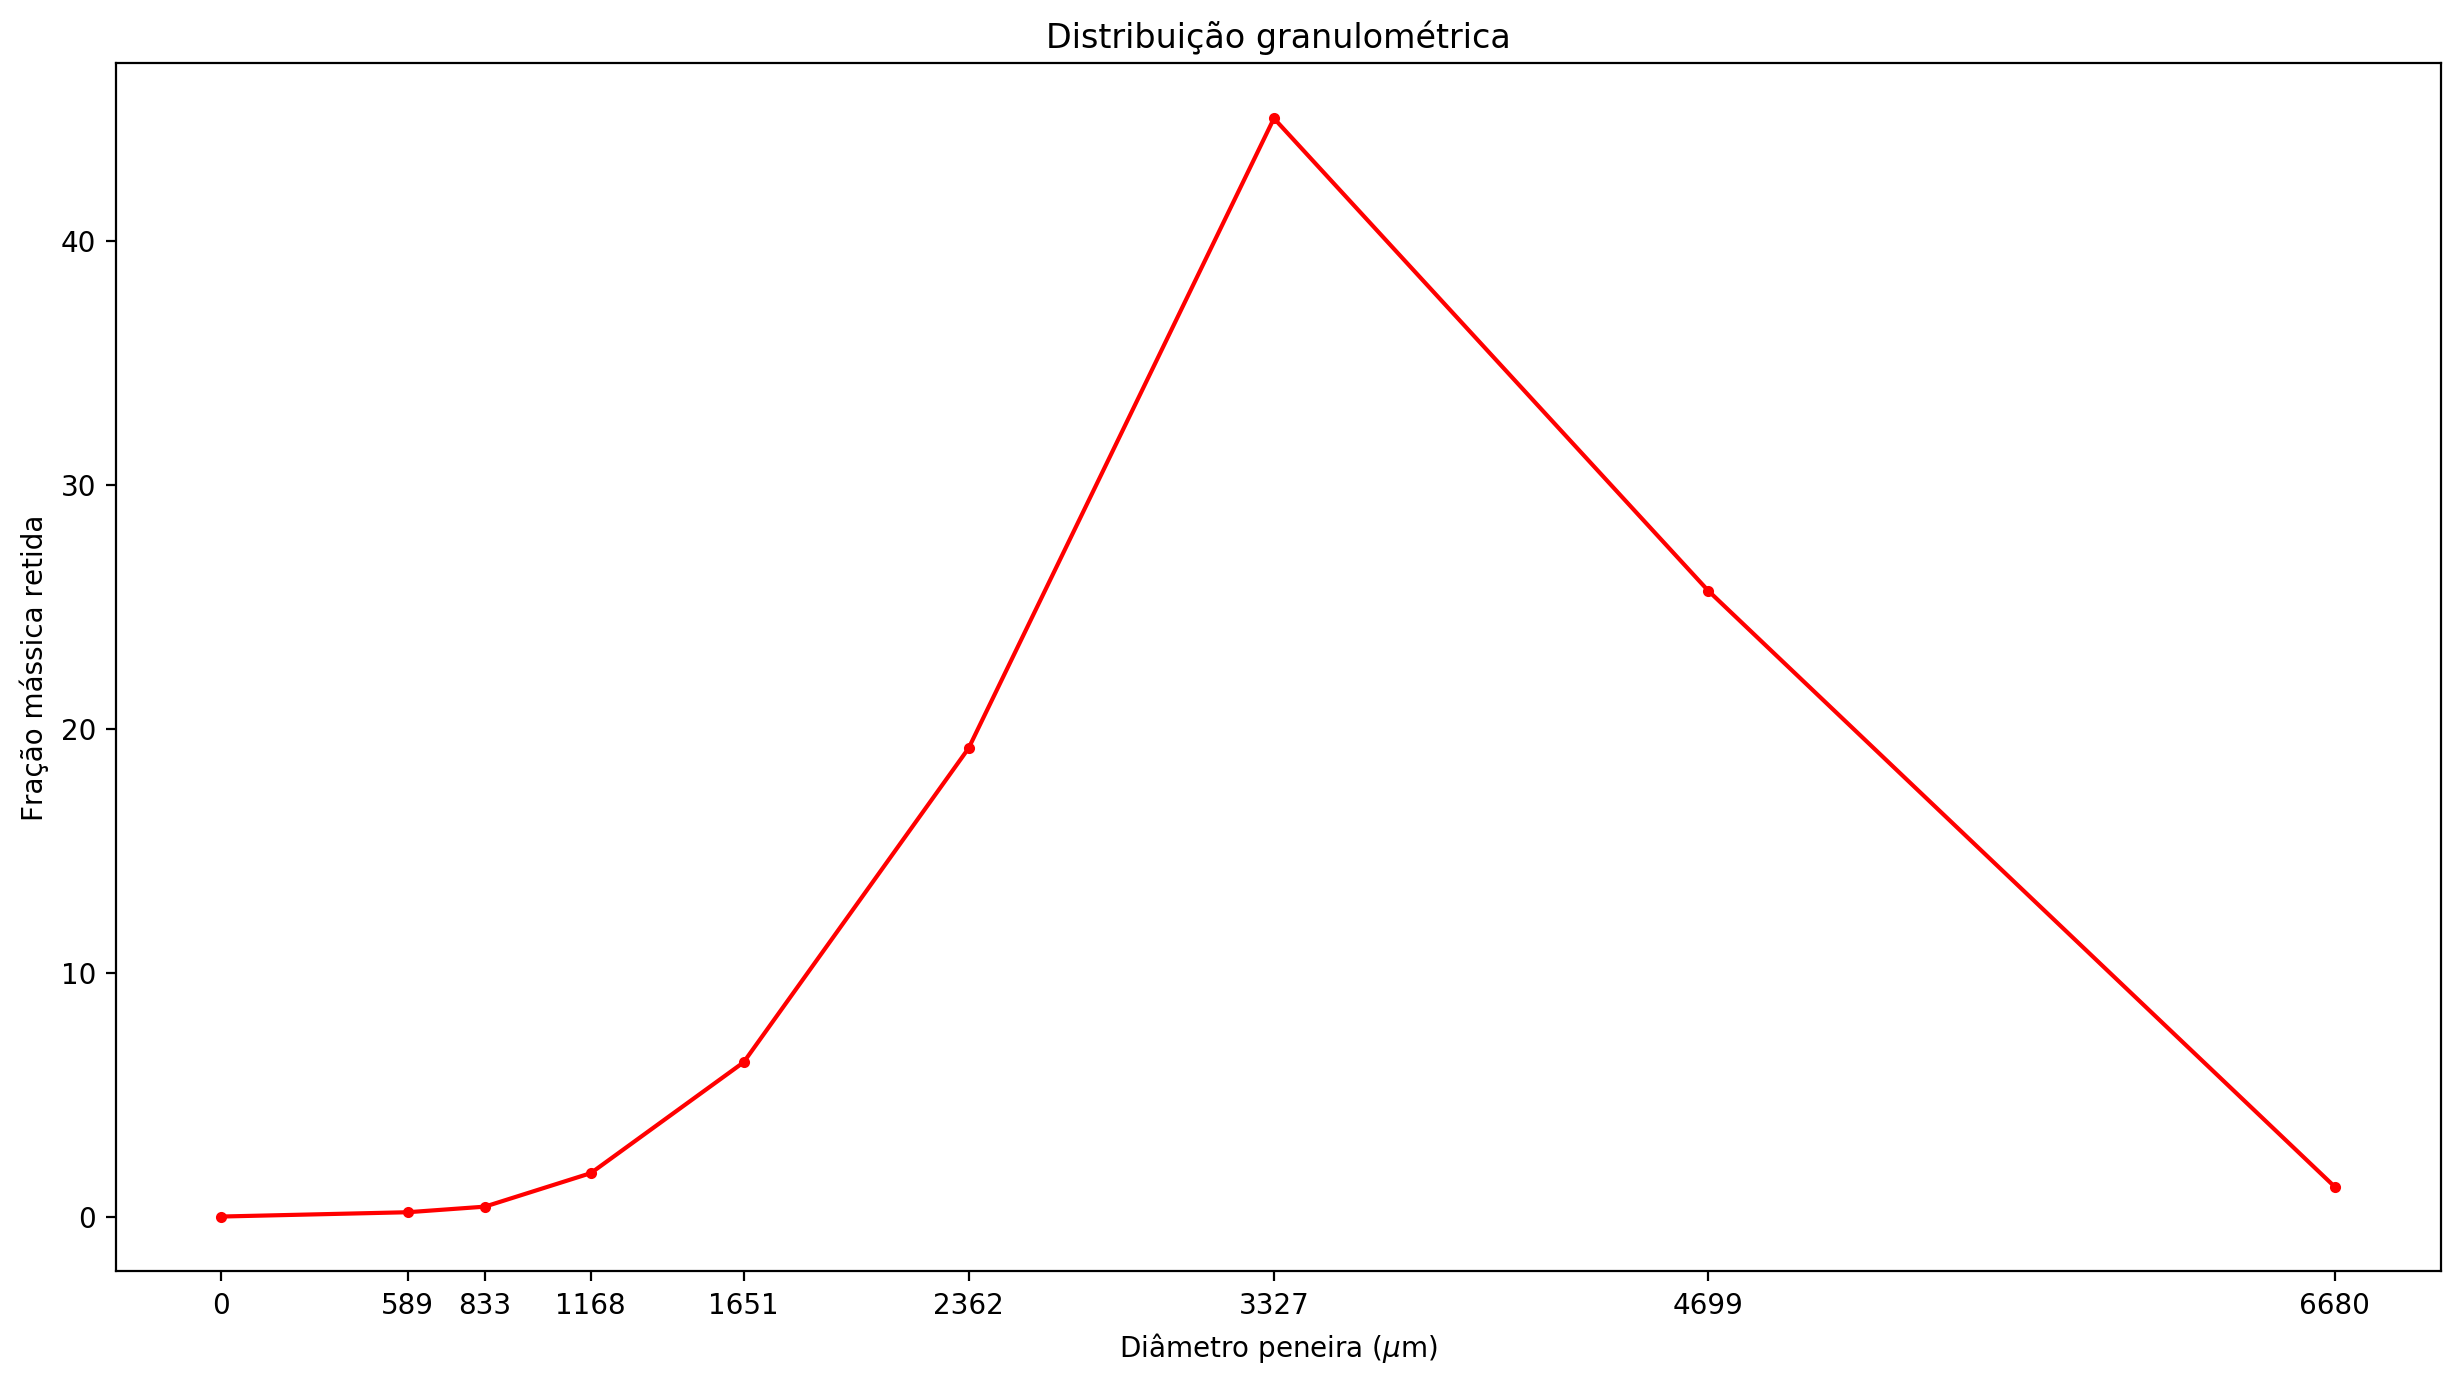

In [11]:
fig = plt.figure(figsize=(15,8), dpi=200)
plt.plot(diametro_inferior, x_i*100, marker='.', color='red')
plt.xticks(diametro_inferior)
plt.title('Distribuição granulométrica')
plt.xlabel('Diâmetro peneira ($\mu$m)')
plt.ylabel('Fração mássica retida')
plt.show()

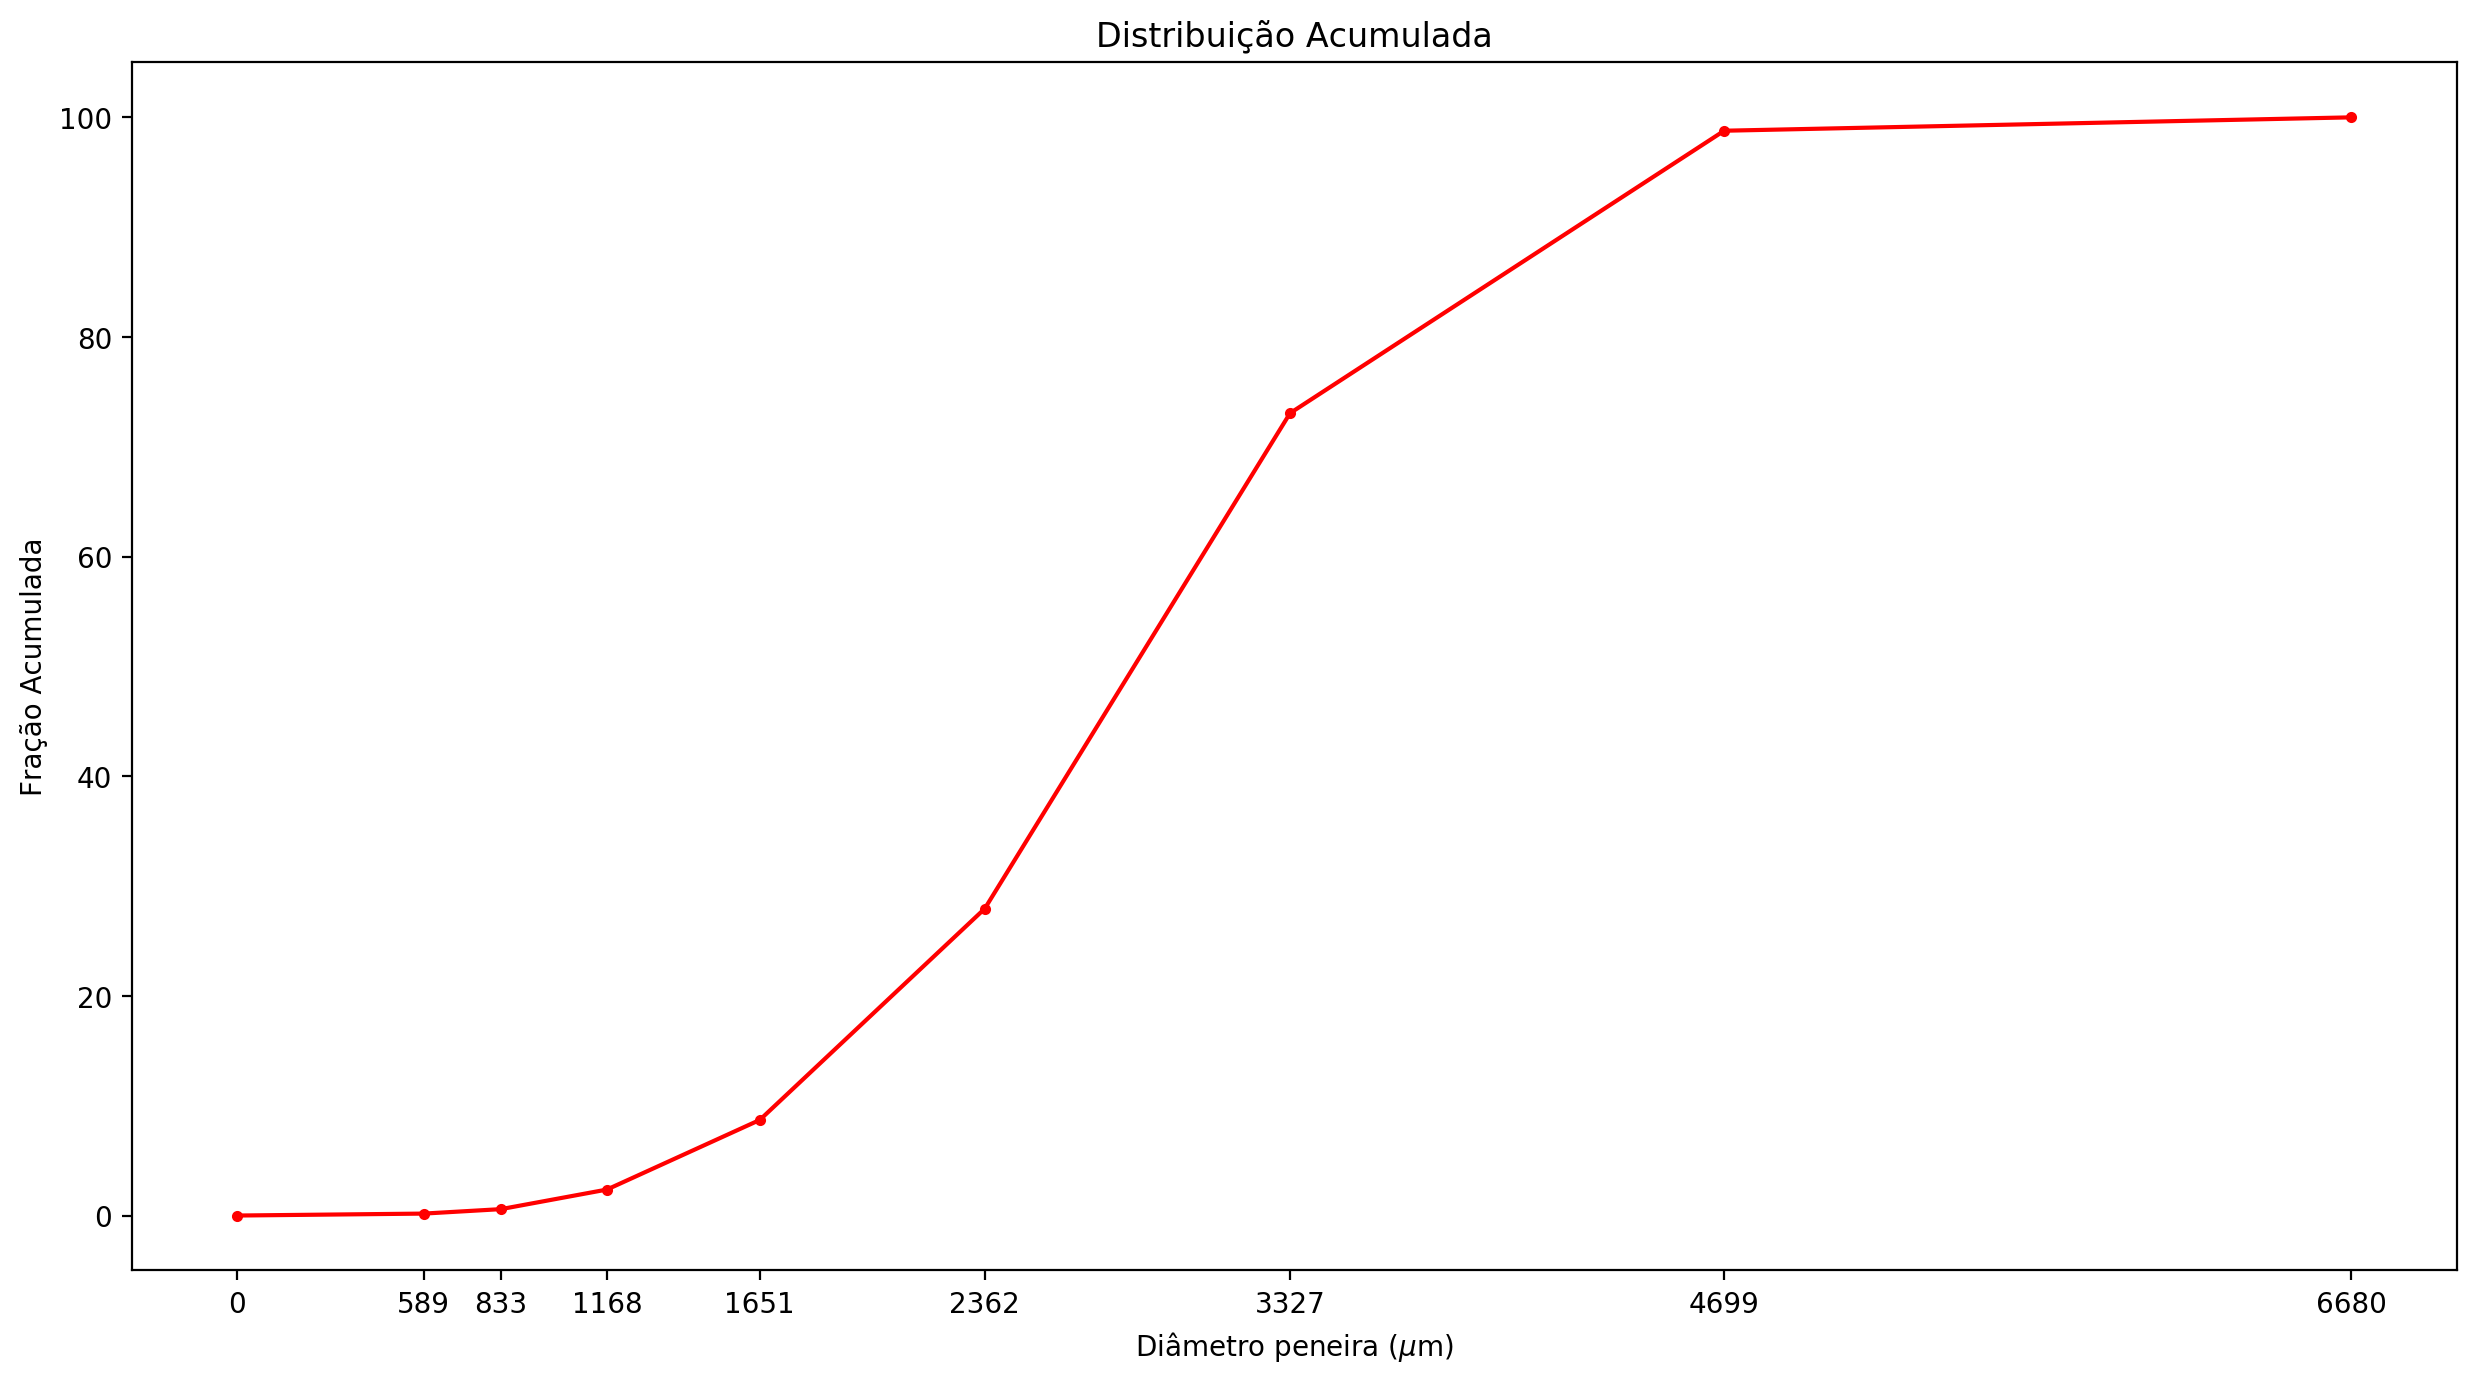

In [12]:
fig = plt.figure(figsize=(15,8), dpi=200)
plt.plot(diametro_inferior, X_i*100, marker='.', color='red')
plt.xticks(diametro_inferior)
plt.title('Distribuição Acumulada')
plt.xlabel('Diâmetro peneira ($\mu$m)')
plt.ylabel('Fração Acumulada')
plt.show()

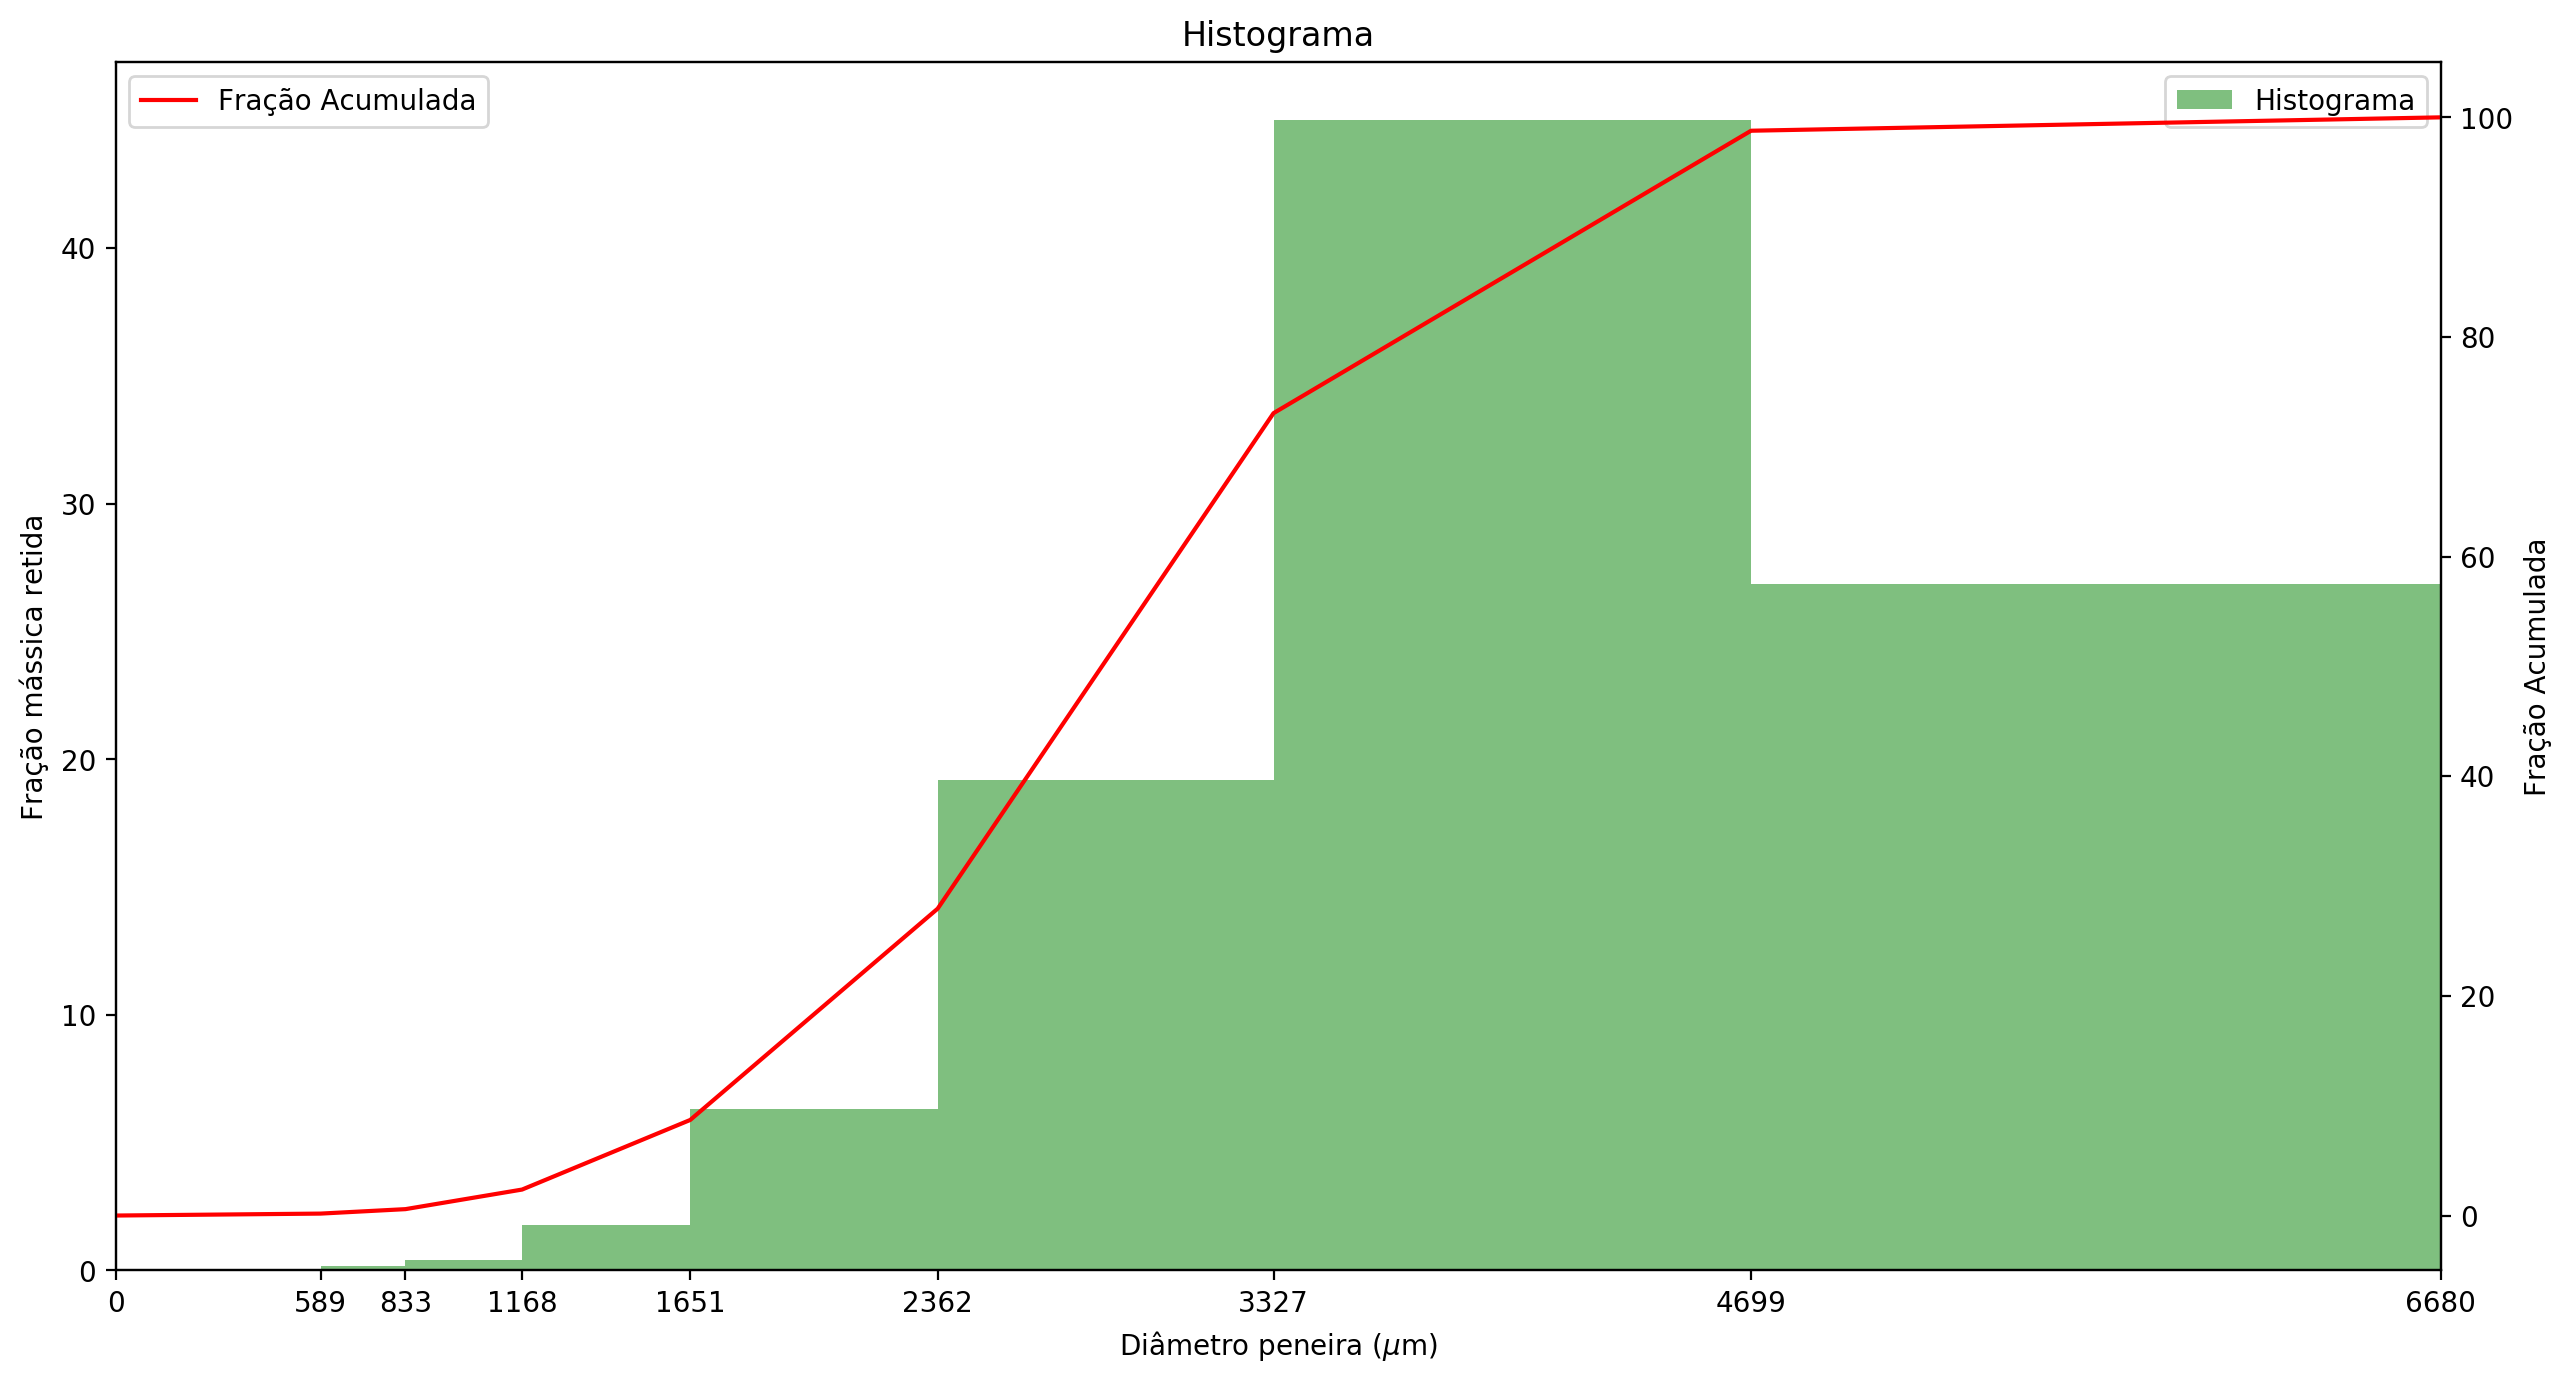

In [13]:
fig = plt.figure(figsize=(15,8), dpi=200)
ax = plt.axes()

plt.xlim((math.ceil(0), math.floor(max(diametro_inferior))))
plt.xticks(diametro_inferior)
plt.hist(diametro_inferior, weights=x_i*100, bins=diametro_inferior[::-1],
         density=False, alpha = 0.5, color='green', label='Histograma')
plt.title('Histograma')
plt.xlabel('Diâmetro peneira ($\mu$m)')
plt.ylabel('Fração mássica retida')

ax_bis = ax.twinx()
ax_bis.plot(diametro_inferior, X_i*100, color='red', label='Fração Acumulada')
plt.xticks(diametro_inferior)
plt.xlabel('Diâmetro peneira ($\mu$m)')
plt.ylabel('Fração Acumulada')
ax_bis.legend()
ax.legend()
plt.show()

# Modelos

In [14]:
%matplotlib inline

In [15]:
# %matplotlib qt

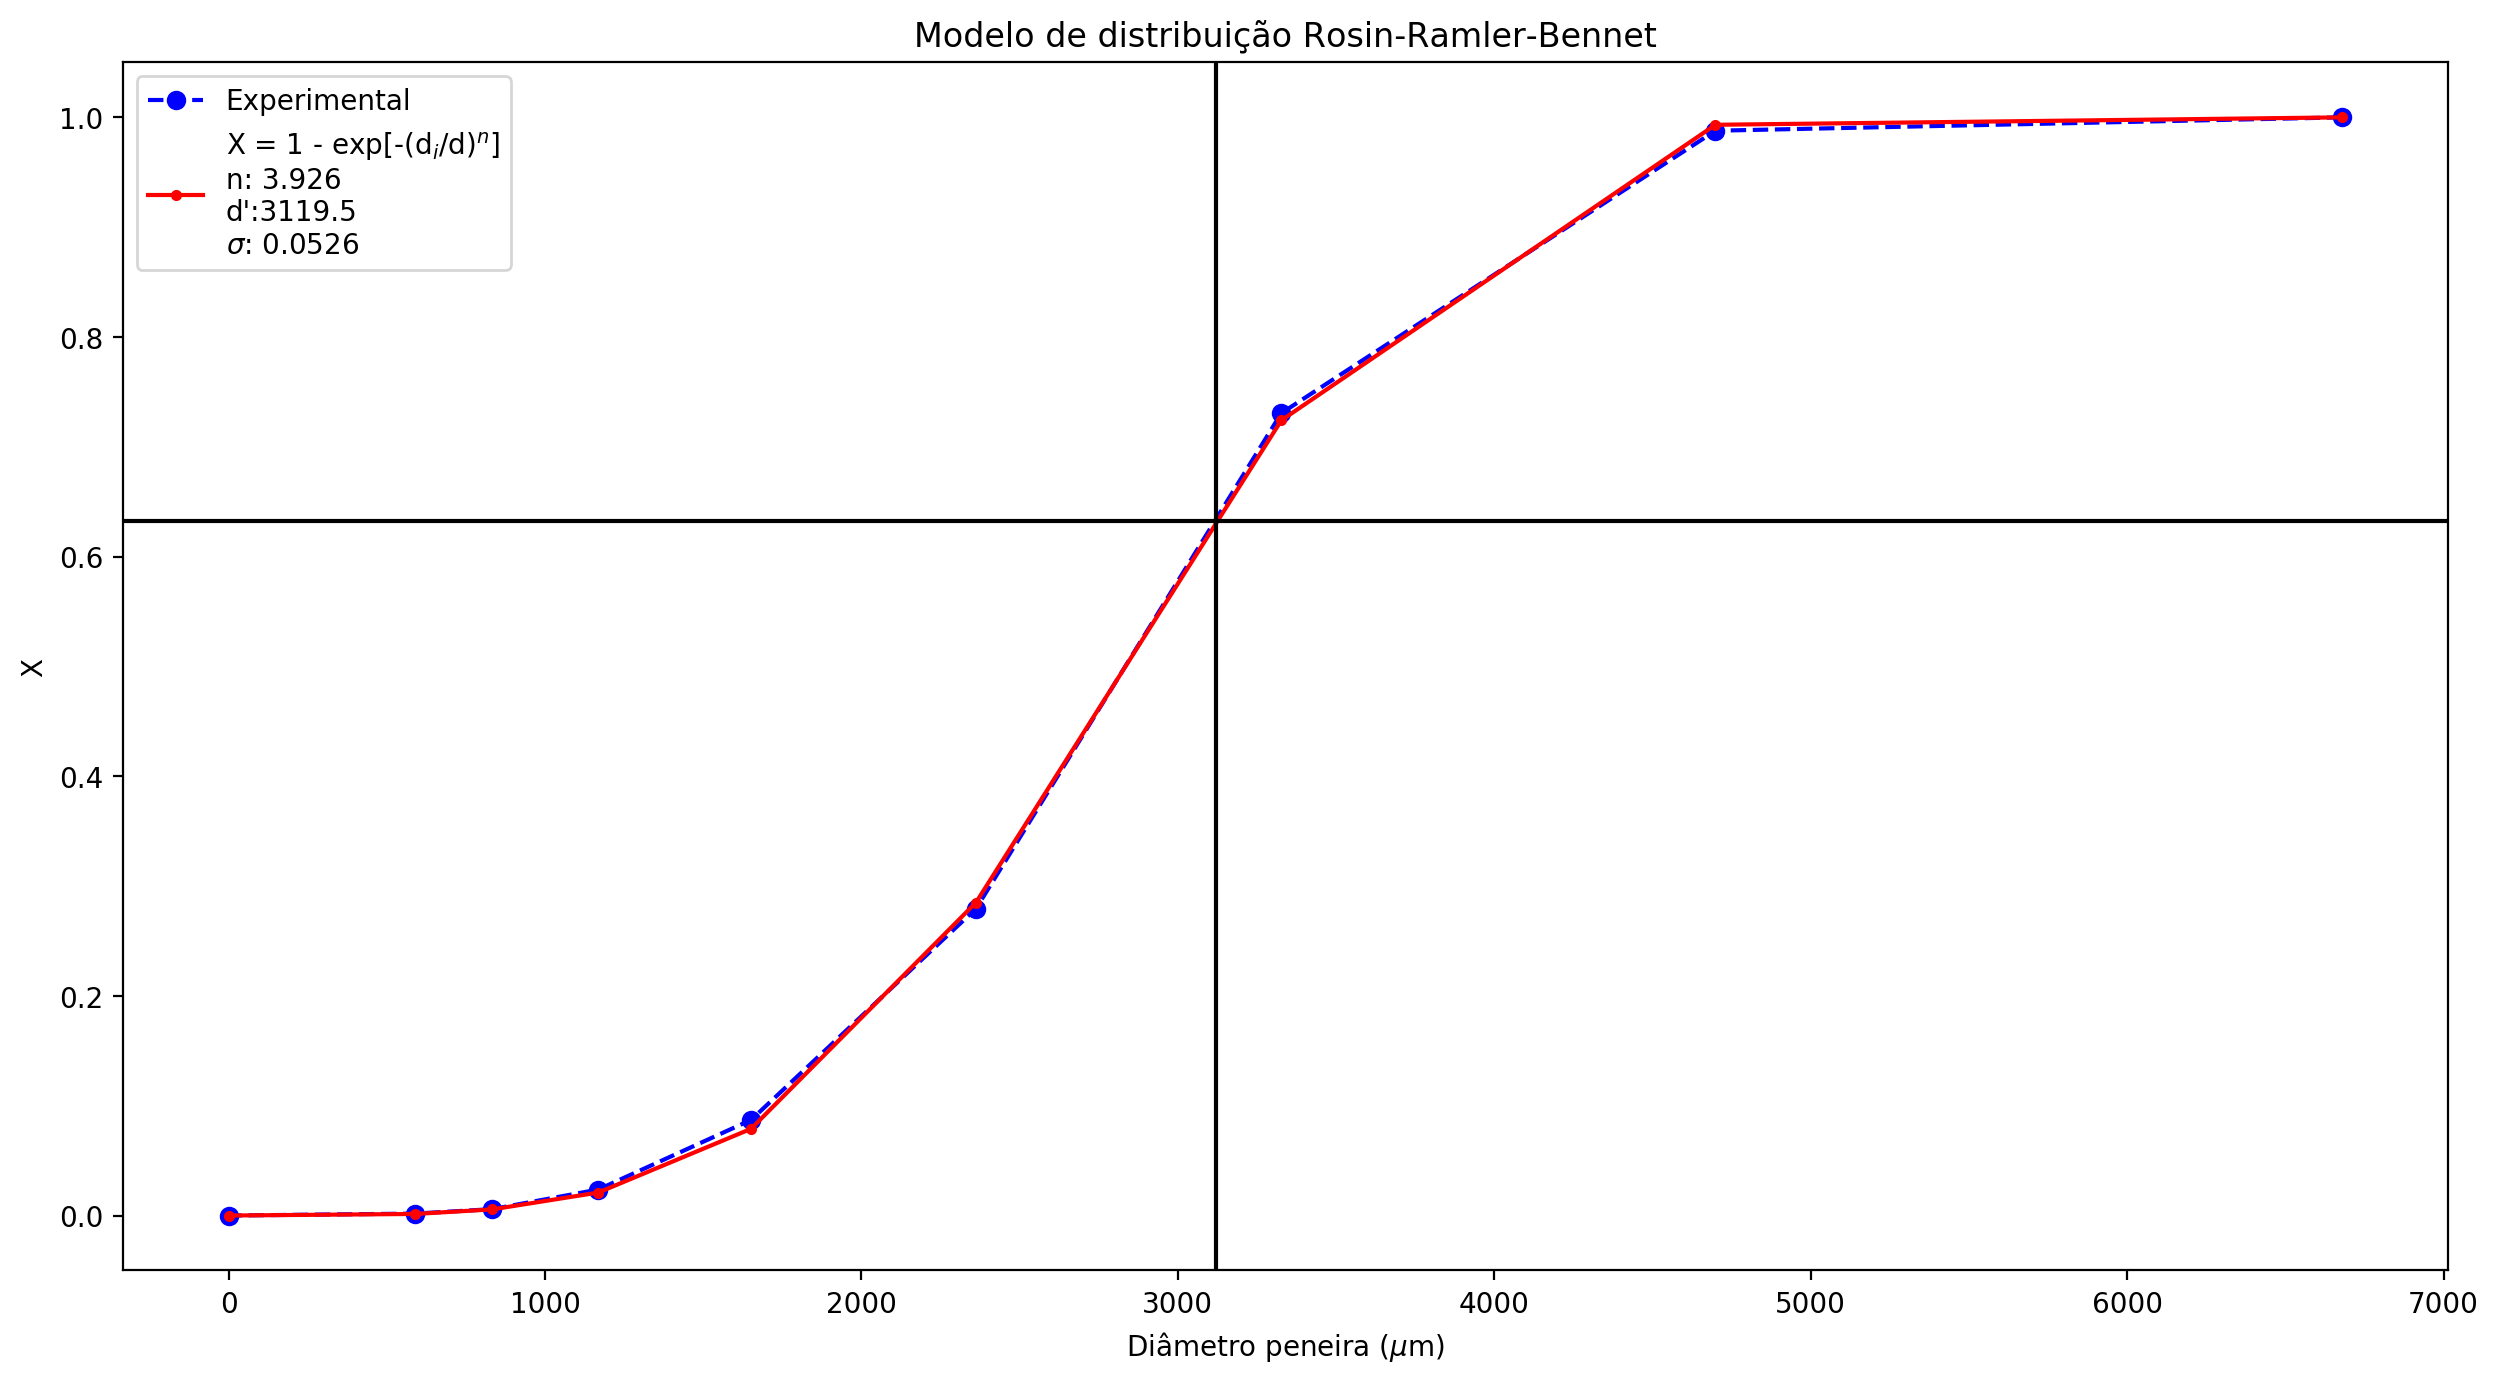

In [16]:

global d_linha
d_linha = 3119.5

def func(x, b):
    return 1 - np.exp(-(x/d_linha)**b)

xdata = diametro_inferior
ydata = X_i

fig = plt.figure(figsize=(15,8), dpi=200)

plt.plot(xdata, ydata, '--', label='Experimental', color='blue', marker='o')
popt, pcov = curve_fit(func, xdata, ydata)

# axis = np.linspace(min(xdata), max(xdata), 100)
axis = xdata

ax = plt.plot(axis, func(axis, *popt), 'r-',
    label=f"X = 1 - exp[-(d$_i$/d)$^n$]\nn: {popt[0]:5.4}\nd':{d_linha}\n$\sigma$: {np.sqrt(np.diag(pcov))[0]:5.4}",
    color='red', marker='.')

plt.title('Modelo de distribuição Rosin-Ramler-Bennet')
plt.xlabel('Diâmetro peneira ($\mu$m)')
plt.axhline(0.632, color='black')
plt.axvline(d_linha,color='black')
plt.ylabel('X')
plt.legend()
plt.show()

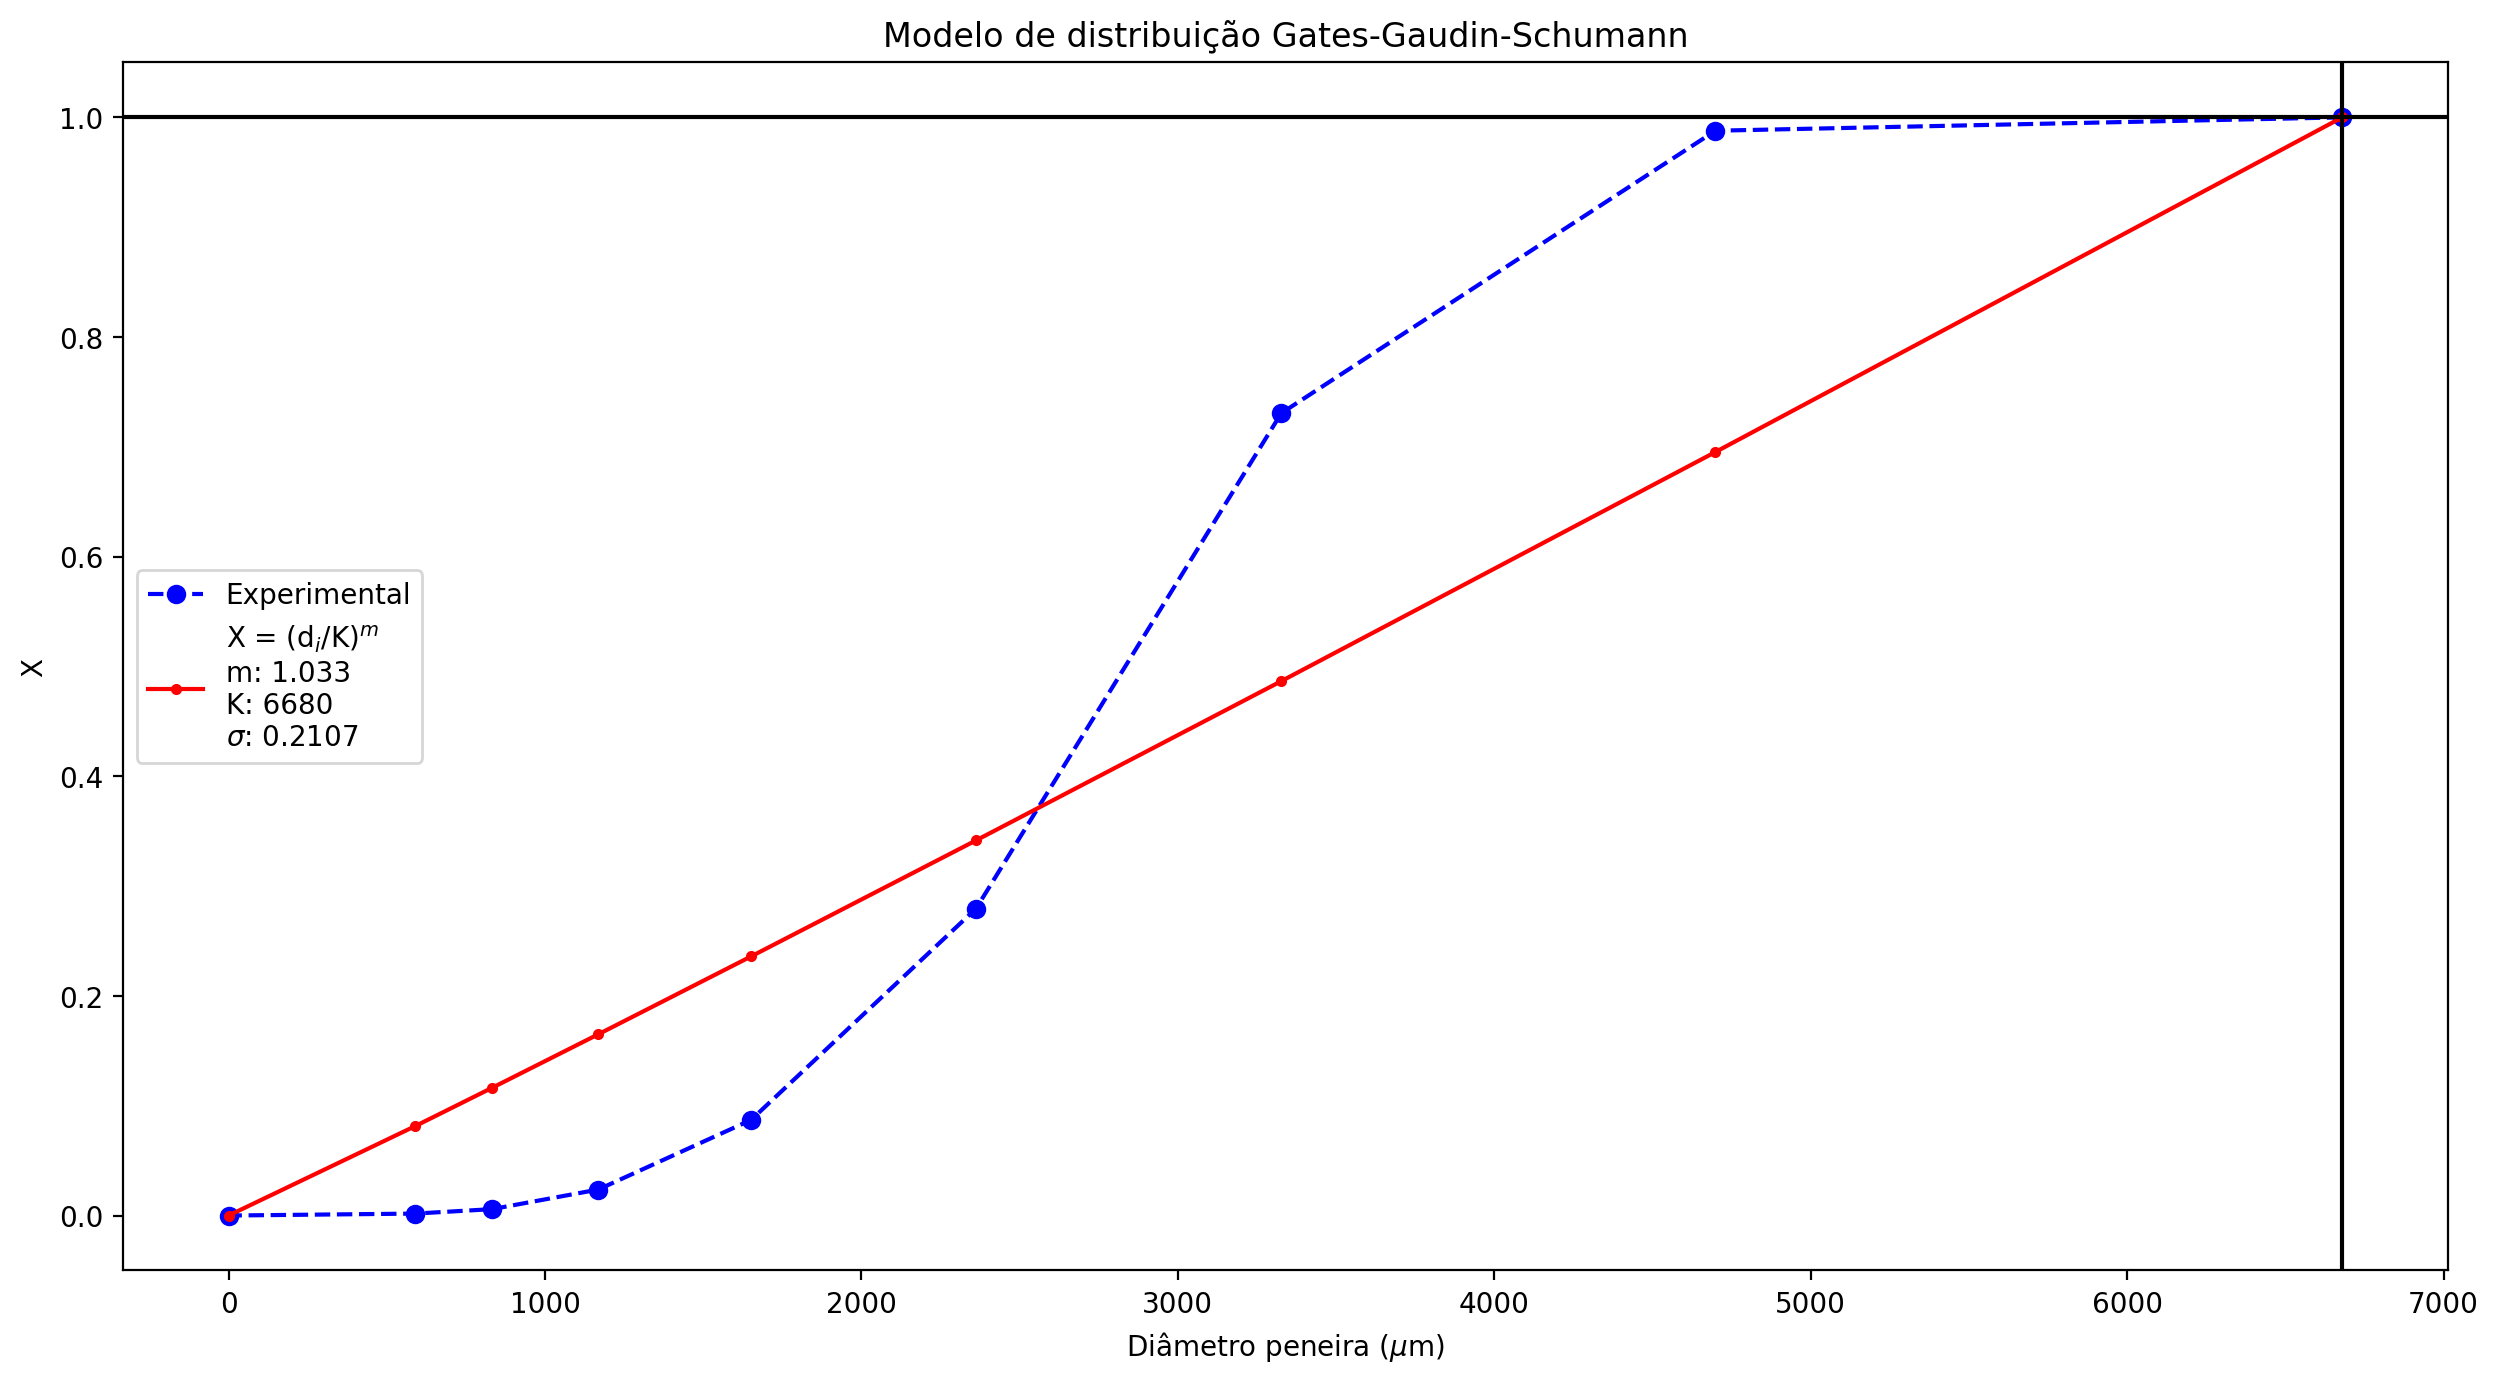

In [17]:

global K
K = 6680

def func_g(x, b):
    return (x/K)**b

xdata = diametro_inferior
ydata = X_i

fig = plt.figure(figsize=(15,8), dpi=200)

plt.plot(xdata, ydata, '--', label='Experimental', color='blue', marker='o')
popt_g, pcov_g = curve_fit(func_g, xdata, ydata)

# axis = np.linspace(min(xdata), max(xdata), 100)
axis = xdata

ax = plt.plot(axis, func_g(axis, *popt_g), 'r-',
     label=f"X = (d$_i$/K)$^m$\nm: {popt_g[0]:5.4}\nK: {K}\n$\sigma$: {np.sqrt(np.diag(pcov_g))[0]:5.4}",
     color='red', marker='.')

plt.title('Modelo de distribuição Gates-Gaudin-Schumann')
plt.xlabel('Diâmetro peneira ($\mu$m)')
plt.axhline(1, color='black')
plt.axvline(K, color='black')
plt.ylabel('X')
plt.legend()
plt.show()

### Cálculo do diâmetro de Sauter

In [18]:
soma = 0
for i in range(1,len(d_i)):
    soma+= (x_i[i]/d_i[i])

In [19]:
d_sauter = 1/soma

# Diametro de Sauter

In [20]:
print(f'{d_sauter:.6}')

3630.81


# Perguntas

![](atv_2_perguntas.png)

# Resultados

[Distribuição aleatória](#Curva) Distribuição aleatória        
[Peneiras escolhidas](#Tamanho-das-peneiras-escolhidas-em-Microns) Peneiras escolhidas        
[Frequencia ponderal e acumulada](#Frequencia) Frequencia ponderal e acumulada         
[Modelos de distribuição](#Modelos) Modelos de distribuição:   RRB e GGS        
[Diâmetros médio de Sauter](#Diametro-de-Sauter) Diâmetros médio de Sauter:   3631.45 $\mu$m           

### O melhor modelo para a distribuição usada foi o RRB pois apresentou $\sigma$: 0.0526
### E o segundo modelo GGS apresentou $\sigma$: 0.2107